#### Object Oriented Programming

In [1]:
class students:
    def __init__(self) -> None:
        self.ID = 2 # class has memory (2 in this case)/states
        b = 3

In [2]:
student1 = students() # when you create an object __init__ always inititated

In [3]:
class students:
    def __init__(self, ID):
        self.ID = ID # self refers to the object, student2 in this case
        b = 3

student2 = students(3) 
student2.ID

3

In [4]:

student2.b #not instance variable, it's local variable

AttributeError: 'students' object has no attribute 'b'

In [5]:
import torch

In [6]:
a = torch.tensor([2.0, 8.0])

In [7]:
a

tensor([2., 8.])

In [8]:
w = torch.tensor([3.0, 7], requires_grad=True)
w

tensor([3., 7.], requires_grad=True)

In [9]:
a.requires_grad

False

In [25]:
y = torch.dot(a, w)
y

tensor(62., grad_fn=<DotBackward0>)

In [11]:
y.backward()

In [12]:
w.grad

tensor([2., 8.])

`super().__init__()` in your NN from nn.Module you initialize weights and biases, they'll be different each time you create an NN. if you don't inherit nn.Module you have to define backward()

Datasets and DataLoader

In [13]:
import torch
from torch.utils.data import Dataset


In [14]:
!pip install ucimlrepo

In [15]:
from ucimlrepo import fetch_ucirepo

In [16]:
from  sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
le.fit(y.detach())

ValueError: y should be a 1d array, got an array of shape () instead.

In [27]:
y = torch.tensor(y, dtype=torch.long)

g:\Anaconda\envs\dsci6004\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [28]:
class customIrisDataset(Dataset):
    def __init__(self) -> None:
        super().__init__()
        iris = fetch_ucirepo(id=53)

        X = iris.data.features
        y = iris.data.targets
        self.X = torch.tensor(X.to_numpy())
        le = LabelEncoder()
        le.fit(y)
        y = le.transform(y)
        self.y = torch.tensor(y, dtype=torch.long)


    def __len__(self):
        nsamples = self.X.shape[0]
        return nsamples

    def __getitem__(self, idx):
        sample = self.X[idx, :]
        label = self.y[idx]
        return sample, label


In [29]:
irisDataset = customIrisDataset()

g:\Anaconda\envs\dsci6004\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
g:\Anaconda\envs\dsci6004\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
from torch.utils.data import DataLoader

In [31]:
dataloader = DataLoader(irisDataset, batch_size=10, shuffle=True)

In [32]:
for batch in dataloader:
    samples, labels = batch
    print(samples.shape, labels.shape)

torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])
torch.Size([10, 4]) torch.Size([10])


In [33]:
labels

tensor([0, 2, 0, 1, 0, 0, 1, 0, 0, 0])

no need to shuffle dataset when whole dataset is used instead of minibatches

nn.Module

In [34]:
from torch import nn

In [23]:
linLayer = nn.Linear(3, 2, bias=True)
list(linLayer.parameters())

[Parameter containing:
 tensor([[ 0.0984, -0.2580,  0.2861],
         [ 0.5273,  0.1031,  0.5255]], requires_grad=True),
 Parameter containing:
 tensor([0.4183, 0.3747], requires_grad=True)]

In [35]:
linLayer.weight

Parameter containing:
tensor([[ 0.0984, -0.2580,  0.2861],
        [ 0.5273,  0.1031,  0.5255]], requires_grad=True)

In [36]:
linLayer.bias.data = torch.ones(1, 2)

In [37]:
linLayer.bias

Parameter containing:
tensor([[1., 1.]], requires_grad=True)

In [1]:
import torch
torch.randn((1,2), requires_grad=True)

tensor([[-0.4414, -0.0451]], requires_grad=True)

In [38]:
linLayer.bias.data = torch.randn(1, 2)
linLayer.bias

Parameter containing:
tensor([[ 0.4432, -2.2063]], requires_grad=True)

In [39]:
nn.init.constant_(linLayer.bias, 0.2)

Parameter containing:
tensor([[0.2000, 0.2000]], requires_grad=True)

In [41]:
nn.init.normal_(linLayer.bias, mean=9, std=0.9)

Parameter containing:
tensor([[8.5583, 9.0798]], requires_grad=True)

the `_` in the method name indicates it makes in_place changes

In [43]:
data = torch.randn(10,3)
data

tensor([[-0.9699, -1.1992,  1.3645],
        [ 0.3657,  0.7209, -0.7040],
        [-0.7628,  0.1473,  1.3700],
        [ 0.6379, -0.1370,  0.7254],
        [ 1.5998, -0.5541,  1.2836],
        [-0.6358,  1.1675, -0.4287],
        [ 1.3899, -0.1137,  1.6007],
        [-0.3905, -0.4929, -0.0048],
        [ 0.7550, -0.5257, -0.8622],
        [ 1.0874, -1.6973, -0.6096]])

In [52]:
out = linLayer.forward(data)
out

tensor([[ 9.1626,  9.1618],
        [ 8.2069,  8.9770],
        [ 8.8372,  9.4127],
        [ 8.8639,  9.7832],
        [ 9.2258, 10.5408],
        [ 8.0720,  8.6396],
        [ 9.1823, 10.6422],
        [ 8.6457,  8.8205],
        [ 8.5216,  8.9706],
        [ 8.9288,  9.1579]], grad_fn=<AddmmBackward0>)

In [53]:
out = linLayer(data) # because calling instance by forward method --> __call__()
out

tensor([[ 9.1626,  9.1618],
        [ 8.2069,  8.9770],
        [ 8.8372,  9.4127],
        [ 8.8639,  9.7832],
        [ 9.2258, 10.5408],
        [ 8.0720,  8.6396],
        [ 9.1823, 10.6422],
        [ 8.6457,  8.8205],
        [ 8.5216,  8.9706],
        [ 8.9288,  9.1579]], grad_fn=<AddmmBackward0>)

In [46]:
out.shape

torch.Size([10, 2])

In [54]:
y = out.sum()

In [55]:
y

tensor(181.7532, grad_fn=<SumBackward0>)

In [49]:
linLayer.bias.grad #nothing because we haven't done backprop yet

In [56]:
y.backward()

In [59]:
linLayer.bias.grad # J of y with respect to bias

tensor([[0., 0.]])

In [58]:
linLayer.zero_grad()

In [60]:
class IrisNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(4, 3) #3 outputs for 3 classes
        # self.relu = nn.ReLU()
        self.l2 = nn.Linear(3, 3)

    def forward(self, x):
        v = self.l1(x)
        # PyTorch has both a function and a class for ReLU, to use the class
        # it should be instantiated in the __init__ method
        # using function here
        h = torch.nn.functional.relu(v)
        # h = self.relu(h) or self.relu.forward(h)
        z = self.l2(h) # same as self.l2.forward(h)

        return z


In [61]:
model = IrisNN()

In [62]:
model

IrisNN(
  (l1): Linear(in_features=4, out_features=3, bias=True)
  (l2): Linear(in_features=3, out_features=3, bias=True)
)

the cross entropy loss class employs both cross entropy and softmax. we can get label via `argmax()`  because softmax is a mapping function so we can apply `argmax()` directly on `z`

`reduction='mean'` gives the avg cross entropy loss

In [63]:
loss_fn = nn.CrossEntropyLoss()

In [66]:
list(model.named_parameters())

[('l1.weight',
  Parameter containing:
  tensor([[ 0.2627, -0.3812,  0.2273, -0.0708],
          [ 0.3906,  0.2544, -0.0283,  0.0134],
          [-0.0849,  0.2003, -0.4190, -0.3839]], requires_grad=True)),
 ('l1.bias',
  Parameter containing:
  tensor([-0.2002,  0.2293,  0.2000], requires_grad=True)),
 ('l2.weight',
  Parameter containing:
  tensor([[ 0.0895,  0.5627, -0.4890],
          [ 0.5012,  0.1880,  0.4669],
          [-0.3527, -0.0326, -0.2548]], requires_grad=True)),
 ('l2.bias',
  Parameter containing:
  tensor([ 0.2719,  0.4198, -0.3495], requires_grad=True))]

In [67]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [69]:
# 1 epoch and 15 iterations
for batch in dataloader:
    samples, labels = batch
    samples = torch.tensor(samples, dtype=torch.float)
    z = model(samples)
    loss = loss_fn(z, labels)
    print("loss", loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad() # or model.zero_grad() ?

loss 1.9111846685409546
loss 1.4885947704315186
loss 1.3217902183532715
loss 2.0443227291107178
loss 1.6534475088119507
loss 1.59877610206604
loss 0.9541583061218262
loss 1.5835015773773193
loss 1.4993705749511719
loss 1.4521924257278442
loss 1.105154275894165
loss 1.120597243309021
loss 1.287549376487732
loss 1.2931174039840698
loss 1.3643887042999268


g:\Anaconda\envs\dsci6004\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# no gradients needed for test/evaluation so turn of grad calculation
with torch.no_grad():
    pass



using sequential()

In [ ]:
class IrisNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.m =nn.Sequential(nn.Linear(4, 3) #3 outputs for 3 classes, 
                                     nn.ReLU(),

                                    nn.Linear(3, 3))

    def forward(self, x):
        z = self.m(x) # same as self.l2.forward(h)

        return z


CNN

In [10]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [3]:
train_dataset = ImageFolder(root='umpire/')

In [4]:
train_dataset.__len__

<bound method DatasetFolder.__len__ of Dataset ImageFolder
    Number of datapoints: 390
    Root location: umpire/>

In [5]:
len(train_dataset)

390

In [7]:
train_dataset[0]

(<PIL.Image.Image image mode=RGB size=300x430>, 0)

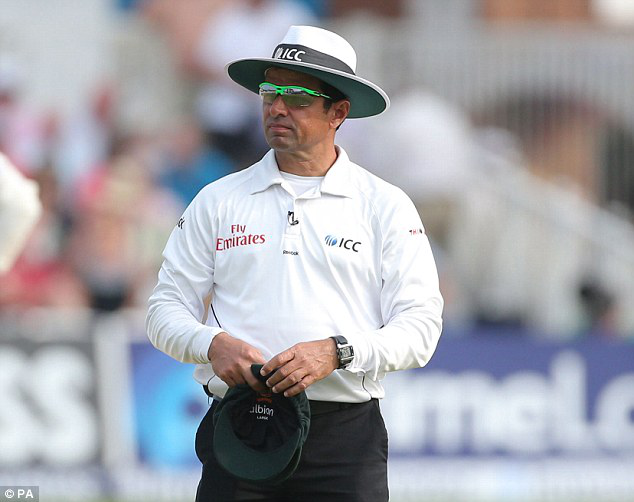

In [8]:
train_dataset[0][0]

In [9]:
train_dataset[0][1]

0

In [13]:
transforms = transforms.Compose([ #maintain order
    transforms.ToTensor(),
    transforms.Resize((32, 32)),]
    )

In [14]:
train_dataset = ImageFolder(root='umpire/',
                            transform=transforms)

In [15]:
train_dataset[0][0]

tensor([[[0.7879, 0.7741, 0.7857,  ..., 0.5989, 0.8018, 0.9106],
         [0.7819, 0.7923, 0.8040,  ..., 0.6505, 0.6840, 0.7596],
         [0.7536, 0.7907, 0.8038,  ..., 0.6651, 0.6756, 0.6802],
         ...,
         [0.7120, 0.5824, 0.6610,  ..., 0.7541, 0.7551, 0.7382],
         [0.7315, 0.7254, 0.7366,  ..., 0.8592, 0.8604, 0.8509],
         [0.6209, 0.7766, 0.7584,  ..., 0.7853, 0.8042, 0.8000]],

        [[0.8154, 0.8015, 0.8132,  ..., 0.4499, 0.7638, 0.9043],
         [0.8015, 0.8119, 0.8236,  ..., 0.5601, 0.6234, 0.7211],
         [0.7732, 0.8103, 0.8234,  ..., 0.6315, 0.6527, 0.6522],
         ...,
         [0.7473, 0.5980, 0.6806,  ..., 0.7816, 0.7826, 0.7656],
         [0.7705, 0.7489, 0.7680,  ..., 0.8906, 0.8918, 0.8800],
         [0.6405, 0.7922, 0.8016,  ..., 0.8206, 0.8317, 0.8332]],

        [[0.8389, 0.8251, 0.8367,  ..., 0.3754, 0.7455, 0.8823],
         [0.8172, 0.8276, 0.8469,  ..., 0.5053, 0.5951, 0.6999],
         [0.7849, 0.8260, 0.8391,  ..., 0.6248, 0.6420, 0.

In [16]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

In [17]:
train_dataset[0][1]

0

In [18]:
from torch.utils.data import DataLoader

In [19]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [20]:
batch = next(iter(train_dataloader))

In [21]:
samples, labels = batch

In [22]:
samples.shape

torch.Size([8, 3, 32, 32])

In [23]:
labels

tensor([1, 1, 1, 0, 1, 0, 1, 1])

In [46]:
'''
CNN Config
Layer 1: 8 3x3 filters, stride=1, padding=0, ReLU
Layer 2: 4 5x5 filters, padding=2, ReLU 
Layer 3: FC 6 neurons, ReLU
Layer 4: output layer
'''

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model =nn.Sequential(nn.Conv2d(3, 8, kernel_size=(3, 3), stride=1, padding=1),  
                                    nn.ReLU(),
                                    nn.Conv2d(8, 4, kernel_size=(5, 5), padding=2), 
                                    # output 4x32x32
                                    nn.ReLU(),
                                    nn.Flatten(), # start dimension is 1 because you are not multiplying batch size
                                    nn.Linear(4096, 6),
                                    nn.ReLU(),
                                    nn.Linear(6, 5)
                                    )

    def forward(self, x):
        z = self.model(x) # same as self.l2.forward(h)

        return z

In [47]:
4*32*32


4096

In [48]:
model = CNN()

In [49]:
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam()

output = model(samples)

In [50]:
output.shape

torch.Size([8, 5])

In [3]:
sorted([8, 2, 5], reverse=True)

[8, 5, 2]

In [48]:
def subsetA(arr):
    # Write your code here
    arr = sorted(arr)
    import numpy as np
    
    for i in range(1, len(arr)+1):
        A = arr[-i:]
        B = arr[0:-i]
        print(arr, A, B)
        if np.sum(A) > np.sum(B):
            return A


subsetA([3,4, 9, 0, 3])

[0, 3, 3, 4, 9] [9] [0, 3, 3, 4]
[0, 3, 3, 4, 9] [4, 9] [0, 3, 3]


[4, 9]

In [38]:
for i in range(4, 2): i

Now with ResNet

In [2]:
import numpy as np
from torchvision.datasets import ImageFolder 
from torch.utils.data import dataloader
from torchvision import transforms
import torch.nn as nn

In [ ]:
train_dataset = ImageFolder(root="umpire/")

In [3]:
transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

remove `.` before `utils` in the `resnet.py` from Canvas because it's not being used as a part of the package (check if needed still)

In [7]:
from resnet import resnet18
import torch

In [8]:
model = resnet18()
model.load_state_dict(torch.load("resnet18-f37072fd.pth"))

<All keys matched successfully>

In [9]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [11]:
for param in model.parameters():
    param.requires_grad = False

In [13]:
model.fc = nn.Linear(512, 5)
model.fc

Linear(in_features=512, out_features=5, bias=True)